In [13]:
from cz.io import Data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = Data(clean=True)

Sample size changed from 64320 to 63481


In [ ]:
class Preprocess:
    def __init__(self, train_data, val_data):
        self.train_data = train_data
        self.val_data = val_data
    
    def remove_seasonality(self, deg = 2)

In [6]:
x_train = data.train_data.filter(["sin_MOY", "cos_MOY"]).values
y_train = data.train_data.Temperature.values

In [29]:
poly = PolynomialFeatures(2)

In [30]:
reg = LinearRegression().fit(poly.fit_transform(x_train), y_train)
y_pred = reg.predict(poly.fit_transform(x_train))

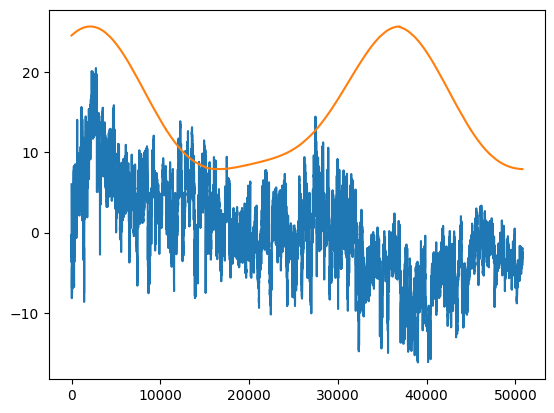

In [31]:
plt.plot(y_train - y_pred)
plt.plot(y_pred)
plt.show()


In [32]:
# Let us assume linear trend in the data
sns.lineplot(d.Temperature.values)

NameError: name 'd' is not defined

In [262]:
def jd(x):
    return x.to_julian_date()
    

In [264]:
d

,id,date,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature,sin_MOY,cos_MOY
17665,17665,2017-01-01 00:15:00,13.061,1.139,9.523,-0.924,4.873,1.492,9.989,0.017345,0.999850
17666,17666,2017-01-01 00:30:00,13.128,1.072,8.599,-0.746,4.660,1.401,10.130,0.017524,0.999846
17667,17667,2017-01-01 00:45:00,12.793,0.804,8.635,-0.711,4.295,1.097,9.919,0.017703,0.999843
17668,17668,2017-01-01 01:00:00,13.798,1.674,9.985,0.036,4.264,1.218,10.060,0.017882,0.999840
17669,17669,2017-01-01 01:15:00,12.726,0.804,8.422,-0.604,4.203,1.127,9.426,0.018060,0.999837
...,...,...,...,...,...,...,...,...,...,...,...
51451,51451,2017-12-18 22:45:00,14.401,4.689,10.838,2.736,3.320,1.157,4.643,-0.222197,0.975002
51452,51452,2017-12-18 23:00:00,14.803,4.756,11.691,3.056,3.350,1.066,4.713,-0.222023,0.975041
51453,51453,2017-12-18 23:15:00,14.602,4.622,11.549,2.878,3.290,0.853,4.713,-0.221848,0.975081
51454,51454,2017-12-18 23:30:00,14.736,4.354,11.371,2.701,3.076,0.761,4.784,-0.221674,0.975121


In [265]:
jd = d.date.apply(jd).values

numpy.datetime64('2016-07-01T00:00:00.000000000')

In [266]:
reg = LinearRegression().fit(jd.reshape(-1, 1),d.Temperature.values.reshape(-1, 1))

In [267]:
y_pred = reg.predict(jd.reshape(-1, 1))

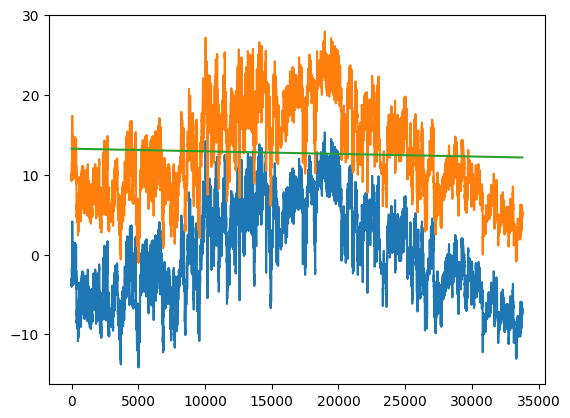

In [270]:
plt.plot(d.Temperature.values - y_pred[:,0])
plt.plot(d.Temperature.values)
plt.plot(y_pred[:,0])



In [248]:
y_pred.shape

(51456, 1)

In [247]:
data.train_data.Temperature.values.shape

(51456,)

In [200]:
nd_df = pd.DataFrame()
nd_df["ds"] = ndf.filter(["ds"]).resample("D", on="ds").mean().index
nd_df["y"] = ndf.filter(["ds", "y"]).resample("D", on="ds").mean().y.values
nd_df["unique_id"] = [1 for _ in range(nd_df.shape[0])]

<Axes: xlabel='ds'>

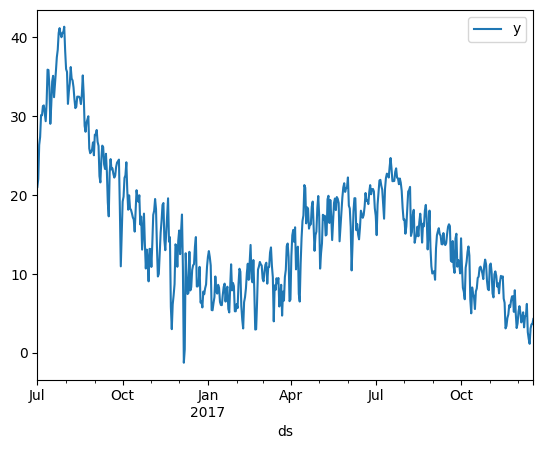

In [201]:
nd_df.plot(x="ds", y="y")

In [202]:
nd_df

,ds,y,unique_id
0,2016-07-01,21.025677,1
1,2016-07-02,22.053792,1
2,2016-07-03,26.355917,1
3,2016-07-04,27.369385,1
4,2016-07-05,30.139260,1
...,...,...,...
531,2017-12-14,1.152656,1
532,2017-12-15,3.097490,1
533,2017-12-16,3.625083,1
534,2017-12-17,3.681490,1


In [209]:
mstl = MSTL(
    season_length=[365],
    trend_forecaster = AutoARIMA()
)

In [210]:
sf = StatsForecast(
    models=[mstl], # model used to fit each time series 
    freq='D', # frequency of the data
    n_jobs=-1,
)

In [211]:
sf.fit(df=nd_df)

StatsForecast(models=[MSTL])

In [212]:
sf.fitted_

array([[MSTL]], dtype=object)

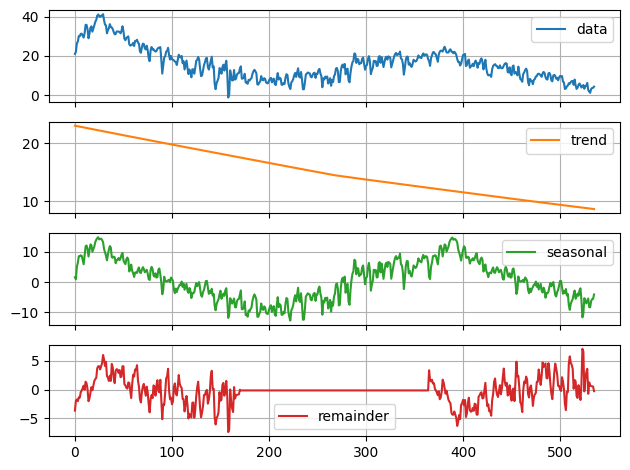

In [213]:
sf.fitted_[0, 0].model_.plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()


/opt/miniconda3/envs/code_zero/lib/python3.12/site-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


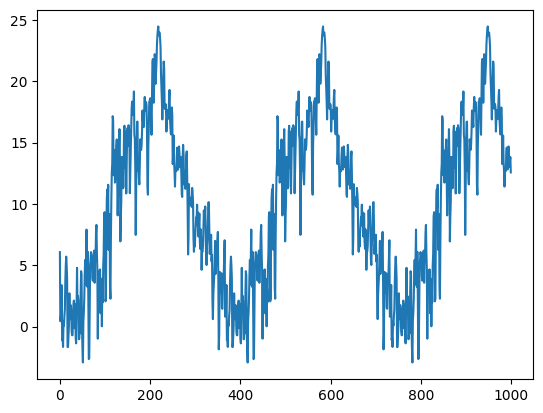

In [192]:
plt.plot(sf.predict(h=1000).MSTL.values)

/opt/miniconda3/envs/code_zero/lib/python3.12/site-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


<Axes: xlabel='unique_id'>

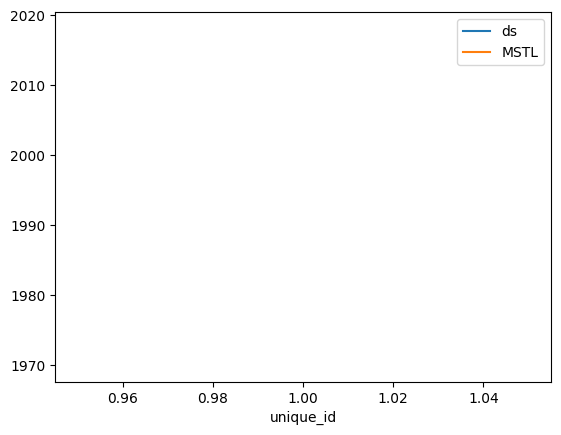

In [157]:
sf.predict(h=30).plot()

In [144]:
sf.fitted_[0, 0].model_

,data,trend,seasonal,remainder
0,21.025677,23.043462,1.635186,-3.652971
1,22.053792,23.010159,0.972002,-1.928370
2,26.355917,22.976869,5.098488,-1.719441
3,27.369385,22.943591,6.422363,-1.996568
4,30.139260,22.910326,8.568438,-1.339504
...,...,...,...,...
531,1.152656,8.698743,-8.291321,0.745234
532,3.097490,8.678146,-6.204527,0.623870
533,3.625083,8.657564,-5.624384,0.591904
534,3.681490,8.636994,-5.496594,0.541090


In [28]:
sf.fitted_[0, 0].model_.plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

AttributeError: 'dict' object has no attribute 'plot'

In [22]:
sf.fitted_[0, 0].season_length

[365]

In [38]:
sf

StatsForecast(models=[AutoTBATS])

In [39]:
[0]

[0]

In [48]:
sf.fitted_[0][0].model_["x"].shape

(51456, 31)

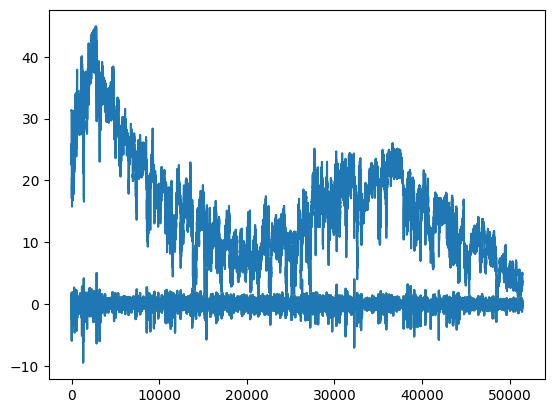

In [52]:
plt.plot(sf.fitted_[0][0].model_["x"][:,:])